# **Notebook for synthetic data generation**

In [27]:
# Imports
from openai import OpenAI
import os
import json
import ast
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter, deque

## **Set up communication with OpenAI API**

In [ ]:
# Retrieve the system prompt
with open("prompt/data-synthetization.json", "r") as f:
    data = json.load(f)

prompt = data["prompt"]
print(prompt)

Generate a realistic and diverse list of JSON objects simulating synthetic users’ interactions with ScholéAI, an AI-powered personalized online learning platform for Data Science learners. Each object must represent both explicit feedback and implicit behavior during platform usage. The structure of each object must follow exactly the schema below:

{
  "user_id": int,
  "explicit_data": {
    "ratings_on_modules": { "module_X": int (1–5), ... },
    "approval_of_content_modifications": [
      {
        "change_id": str,
        "change": str,
        "status": "approved" | "rejected"
      }
    ],
    "explicit_learning_goals": str,
    "drag_and_drop_curriculum_edits": [
      {
        "module": str,
        "from_index": int,
        "to_index": int
      }
    ],
    "curriculum_editing_feedback": str,
    "preferred_content_format": "text" | "video" | "audio",
    "reflection_inputs": str,
    "satisfaction_surveys": {
      "overall_satisfaction": int (1–5),
      "interface_u

In [ ]:
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "<your OpenAI API key if not set as env var>"))
model = "gpt-4o-mini"
response = client.responses.create(
    instructions=prompt,
    model=model,
    input="Generate 1 sample.",
)

response.to_dict()["output"]


[{'id': 'msg_681795ac28988191bf9eebb1d09c289d0c15dc02627e95db',
  'content': [{'annotations': [],
    'text': '```json\n{\n  "user_id": 1,\n  "explicit_data": {\n    "ratings_on_modules": { "Introduction to Data Science": 5, "Machine Learning Basics": 4, "Data Visualization": 3 },\n    "approval_of_content_modifications": [\n      {\n        "change_id": "mod123",\n        "change": "Added more examples to Data Visualization",\n        "status": "approved"\n      }\n    ],\n    "explicit_learning_goals": "To gain a solid understanding of machine learning algorithms and improve data visualization skills.",\n    "drag_and_drop_curriculum_edits": [\n      {\n        "module": "Machine Learning Basics",\n        "from_index": 1,\n        "to_index": 0\n      }\n    ],\n    "curriculum_editing_feedback": "Would prefer more practical examples and case studies.",\n    "preferred_content_format": "video",\n    "reflection_inputs": "I find it useful to see real-world applications of concepts.",

## **Extract most important concept from ScholeAI Knowledge Graph**

In [33]:
# Print skills set and relations set graphs
GRAPH_PATH = "graphs"
with open(os.path.join(GRAPH_PATH, "skills_set.txt"), "r") as f:
    skills_set = ast.literal_eval(f.read())
print("Skill set: ", skills_set, end='\n\n')

with open(os.path.join(GRAPH_PATH, "relations_set.txt"), "r") as f:
    relations_set = ast.literal_eval(f.read())
print("Relation set: ", relations_set)

Skill set:  {'brute force algorithms', 'analysis of variance', 'statistical distance', 'algorithm analysis', 'density estimation', 'bias-variance tradeoff', 'sequence', 'approximation', 'universal approximation theorem', 'relational join', 'empirical risk minimization', 'random graph', 'word embedding', 'statistical estimation', 'data cleaning', 'graph theory', 'bayes theorem', 'polynomial basis', 'manifold learning', 'confidence level', 'support vectors', 'majority voting', 'graph laplacian', 'chain rule', 'autoregressive model', 'large deviations theory', 'postprocessing in machine learning', 'data parallelism', 'dynamic bayesian network', 'normal distribution', 'categorical data', 'graph', 'ridge regression', 'probabilistic graphical models', 'logistic function', 'zero-shot learning', 'strong duality', 'parameter initialization', 'eigenfaces', 'sampling', 'causality', 'dendrogram', 'evaluation metrics in machine learning', 'probabilistic model', 'nearest neighbor algorithms', 'encod

In [83]:
# Load relations_set as a directed graph
G = nx.DiGraph(relations_set)

# Number of nodes in the subgraph
K = 25

least squares
kernel methods
neural networks
logistic regression
principal component analysis
classification
model validation and evaluation
standard deviation
predictive modeling
regularization
bootstrapping
deep learning
mean squared error
model selection
probability sampling
cross-validation
data science
spectral clustering
binary classification
ridge regression
linear regression
regression
decision tree
k-means clustering
support vector machine


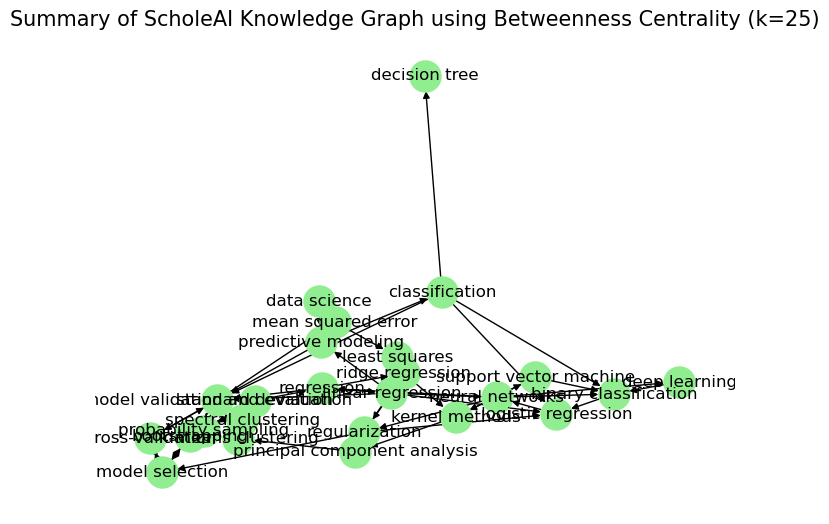

In [84]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_k_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:K]
subgraphBC = G.subgraph(top_k_nodes).copy()

# Print the nodes
for node in list(subgraphBC.nodes):
    print(node)
    
# Visualization
nx.draw(subgraphBC, with_labels=True, node_size=500,
        node_color="lightgreen", arrows=True)
plt.title(f'Summary of ScholeAI Knowledge Graph using Betweenness Centrality (k={K})', fontsize=15)
plt.show()

nearest neighbor classification
explainable artificial intelligence
least squares
neural networks
p-value
logistic regression
model validation and evaluation
randomized controlled trial
predictive modeling
bootstrapping
hypothesis testing
mean squared error
model selection
cross-validation
statistical significance
generalization
algorithmic fairness
bootstrap method
spectral clustering
resampling methods
ridge regression
linear regression
random forests
confidence intervals
support vector machine


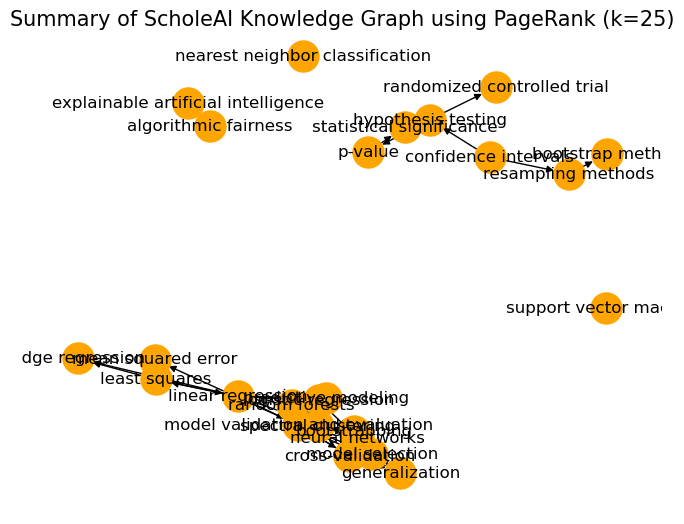

In [85]:
# PageRank
pagerank = nx.pagerank(G)
top_k_nodes = sorted(pagerank, key=pagerank.get, reverse=True)[:K]
subgraphPR = G.subgraph(top_k_nodes).copy()

# Print the nodes
for node in list(subgraphPR.nodes):
    print(node)

# Visualization
nx.draw(subgraphPR, with_labels=True, node_size=500,
        node_color="orange", arrows=True)
plt.title(f'Summary of ScholeAI Knowledge Graph using PageRank (k={K})', fontsize=15)
plt.show()

bias-variance tradeoff
backpropagation
least squares
kernel methods
neural networks
linear model
decision boundary
model fitting
logistic regression
train-test split
empirical distribution function
classification
data partitioning
principal component analysis
model validation and evaluation
standard deviation
ensemble learning
predictive modeling
coefficient of determination
regularization
classifier
bootstrapping
curve fitting
performance metrics
mean squared error
deep learning
model selection
probability sampling
cross-validation
activation function
evaluation metrics
data science
expected loss
bagging
generalization
spectral clustering
binary classification
model comparison
linear regression
ridge regression
stochastic gradient descent
regression
inference
decision tree
random forests
ensemble methods
k-means clustering
linear classifier
overfitting
estimation
support vector machine
model complexity
generalized linear models


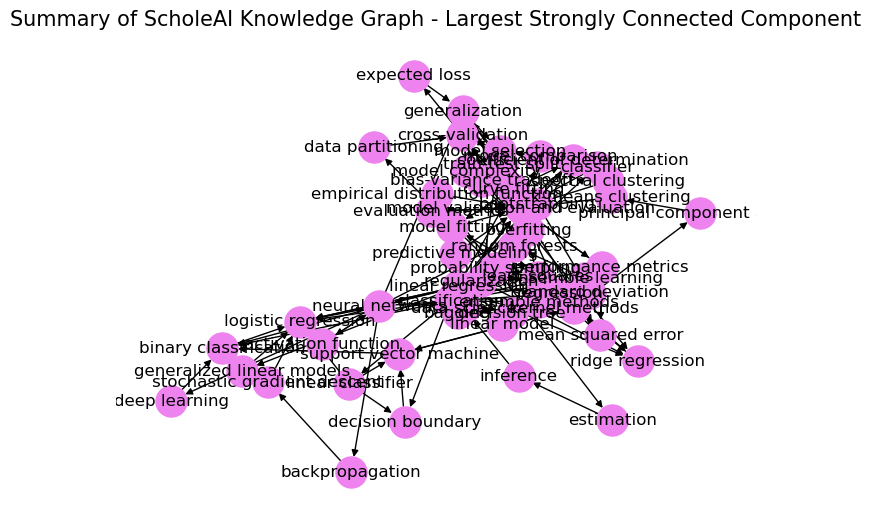

In [86]:
# Strongly connected components
sccs = list(nx.strongly_connected_components(G))
largest_scc = max(sccs, key=len)
subgraphSCC = G.subgraph(largest_scc).copy()

# Print the nodes
for node in list(subgraphSCC.nodes):
    print(node)

# Visualization
nx.draw(subgraphSCC, with_labels=True, node_size=500,
        node_color="violet", arrows=True)
plt.title('Summary of ScholeAI Knowledge Graph - Largest Strongly Connected Component', fontsize=15)
plt.show()

In [89]:
# Group edges by source node
grouped_edges = defaultdict(list)
for u, v in subgraphPR.edges():
    grouped_edges[u].append(v)

# Create string representation
edges_str = "\n".join([f"{u} -> {', '.join(map(str, v_list))}" for u, v_list in grouped_edges.items()])
print(edges_str)

# Save to file
with open(os.path.join(GRAPH_PATH, "graph.txt"), "w") as f:
    f.write(repr(edges_str))


least squares -> linear regression, ridge regression
neural networks -> generalization
p-value -> statistical significance
logistic regression -> neural networks
model validation and evaluation -> mean squared error, generalization, bootstrapping, cross-validation, model selection
predictive modeling -> model validation and evaluation
bootstrapping -> generalization, random forests
hypothesis testing -> randomized controlled trial, statistical significance, p-value
mean squared error -> least squares
model selection -> cross-validation, bootstrapping
cross-validation -> model selection, model validation and evaluation, generalization
statistical significance -> hypothesis testing
generalization -> model selection
algorithmic fairness -> explainable artificial intelligence
spectral clustering -> model validation and evaluation
resampling methods -> bootstrap method
linear regression -> logistic regression, least squares, neural networks, ridge regression, predictive modeling, model vali